# Исследование продаж видео игр

В моём распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У меня есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Данные за 2016 год могут быть неполными.

Цель исследования:
- изучить информацию о продажах игр.
- выявить определяющие успешность игры закономерности.
- проверить гипотезы, которые помогут понять, какие игры стоит продвигать в 2017 году.
- сделать ставку на потенциально популярный продукт, чтобы спланировать рекламные кампании.

Ход исследования:

Необходимые данные получу из датасета games.csv. О состоянии и качестве данных ничего не известно, поэтому я сначала открою файл и изучу общую информацию.

Предобработаю данные:
- Если будут проблемы с наименованием столбцов, то переименую их, чтобы привести к удобным и читаемым названиям.
- Проверю на явные дубликаты и если такие имеются, то удалю.
- Проверю на наличие пропусков и обработаю их.
- Если будет необходимость, то исправлю типы данных
- Обработаю неявные дубликаты.
- Для удобного анализа в дальнейшем - добавлю необходимые столбцы.

Перейду к исследовательскому анализу данных, где опишу и визуализирую информацию о продажах игр:
- Посмотрю, сколько игр выпускалось в разные годы.
- Посмотрю, как менялись продажи по платформам.
- Возьму данные за соответствующий актуальный период.
- Изучу какие платформы лидируют по продажам, растут или падают.
- Построю график "ящик с усами" по глобальным продажам игр в разбивке по платформам.
- Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Соотнесу выводы с продажами игр на других платформах.
- Посмотрю на общее распределение игр по жанрам.

Составлю портрет пользователя каждого региона:
- Определю для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

После этого проверю гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

В завершении сделаю общий вывод по исследованию.

## Открою файл с данными и изучу общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('./datasets/games.csv')

Посмотрю на первые 5 строк датафрейма и посмотрю общую информацию о данных.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Я смог прочесть датасет, каких-то проблем при этом не возникло.

В датасете 11 столбцов и 16715 строк. В некоторых столбцах есть пропуски и неподходящие типы данных. Названия столбцов необходимо привести к нижнему регистру.

## Предобработка данных

### Переименование столбцов

Приведём названия столбцов к стандарту snake_case - в нашем случае это только нижний регистр, так как андерскоры уже есть в названиях столбцов.

In [5]:
data.columns = data.columns.str.lower()

Проверю, что названия столбцов изменились.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Исправление типов данных

Преобразую `year_of_release` в целочисленный тип.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Посмотрю на уникальные не числовые значения в столбце user_score, так как у поля тип `object`, что странно для числового поля.

In [8]:
non_numeric_values = data['user_score'].apply(pd.to_numeric, errors='coerce').isna()
data.loc[non_numeric_values, 'user_score'].unique()

array([nan, 'tbd'], dtype=object)

Как видно из уникальных значений, в столбце есть значение 'tbd', которое означает "to be determined" - "будет определено".
Это значение означает, что у игры нет оценки пользователей, но она будет определена в будущем. Поэтому заменю это значение на пропуски.

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Изменю тип данных в user_score на числовой тип.

In [10]:
data['user_score'] = data['user_score'].astype('float')

Проверю изменения в типах данных.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### Вывод по исправлению типов данных

Я заменил значение 'tbd' в столбце `user_score` на пропуски, исправил тип данных на float.
Привёл тип данных в столбце `year_of_release` к целочисленному типу.

### Обработка пропусков

Проверю на наличие явных дубликатов.

In [12]:
data.duplicated().sum()

0

Определю, сколько пропусков в каждом столбце.

In [13]:
# Создам функцию для определения пропусков
def missing_values(data_with_na):
    return pd.DataFrame(data_with_na.isna().mean() * 100).style.format("{:.2f}%").background_gradient('coolwarm')

In [14]:
missing_values(data)

,0
name,0.01%
platform,0.00%
year_of_release,1.61%
genre,0.01%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
critic_score,51.32%
user_score,54.59%


В столбцах name, year_of_release и genre есть небольшое количество пропусков - 0.01%, 1.61% и 0.01% соответственно.
В целом, их можно удалить ничего сильно от этого не изменится.
В critic_score, user_score, rating пропусков уже больше - 51.32%, 54.59% и 40.48% соответственно.
Удалять их уже нельзя, так как это большая часть данных. Нужно будет посмотреть на данные детально, чтобы понять, что с ними можно сделать.

Удалю пропуски в столбцах name, year_of_release и genre.

In [15]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Посмотрю на уникальные значения в столбце rating.

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце `rating` есть значение рейтинга ESRB за разные годы, того же K-A сейчас уже нет.
Также встречается значение 'RP', которое означает "Rating Pending" - "рейтинг ожидается".
Это значение означает, что у игры нет рейтинга, но он будет определён в будущем.

Момент в том, что ESRB - система оценки игр для продажи в Северной Америке, у Европы и Японии свои системы оценки - PEGI и CERO соответственно. Логично будет проверить - продавались ли игры без рейтинга в США, прежде чем заполнять пропуски в столбце rating.

Найдём те игры, у которых нет рейтинга ESRB и они не продевались в Северной Америке.

In [17]:
without_rating_and_sales_in_na = data.query('rating.isna() and na_sales == 0')
without_rating_and_sales_in_na.shape[0]

3688

Проверим есть ли среди этих игр те, которые продавались в Европе, Японии и других странах.

In [18]:
without_rating_and_sales_in_na.query('eu_sales > 0 or jp_sales > 0 or other_sales > 0').shape[0]

3686

Как видим, у нас есть игры, которые не продавались в Северной Америке и при этом продавались в Европе, Японии и других странах.
Поэтому у данных игр и нет рейтинга ESRB. При этом у нас ещё есть 2 игры, которые не продавались нигде, поэтому у них и нет рейтинга.

Заполним пропуски в столбце rating, для игры, которые не продавались на территории NA - значением "unknown".

In [19]:
data.loc[without_rating_and_sales_in_na.index, 'rating'] = 'unknown'

Проверю, что больше пропусков в столбце rating для игр, которые не продавались на территории США - нет.

In [20]:
data.query('rating.isna() and na_sales == 0').shape[0]

0

Проверю в какие года выходили игры без рейтинга, возможно они выходили до 1994 года (года основания ESRB) и эти игры не оценивались.

In [21]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Какой-то зависимости в пропусках в рейтинге от года выхода игры не видно. Также вряд-ли, игры, которые вышли гораздо раньше, до сих пор ждут своего рейтинга.
Поэтому остальные пропуски в столбце `rating` также заполню значением "unknown", а не "RP".

In [22]:
data['rating'] = data['rating'].fillna('unknown')

Посмотрю на итоговое количество пропусков в датафрейме, после всех манипуляций.

In [23]:
missing_values(data)

,0
name,0.00%
platform,0.00%
year_of_release,0.00%
genre,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
critic_score,51.45%
user_score,54.62%


#### Вывод по обработке пропусков
<a name="filling-the-blanks"></a>
Удалил строки, где были пропуски в столбцах name, year_of_release и genre - 0.01%, 1.61% и 0.01% соответственно. Это небольшое количество пропусков и их удаление не повлияет на результаты анализа, но позволит избежать проблем в дальнейшем.

Пропусков для `critic_score` и `user_score` \~51.45% и \~54.62% соответственно - чуть больше половины данных.
Скорее всего это означает, что для остальных игр нет данных об оценки от пользователей или от критиков.
Больше информации сможем узнать уже при анализе данных.
Больше сделать с этими данными нечего, так как удалять их точно нельзя.

Все пропуски в столбце `rating` заполнил значением "unknown". Часть пропусков скорее всего из-за того, что игры не продавались в Северной Америке. Из-за чего не оценивались остальные игры - определить сложно. Видимо данные по возрастному рейтингу брались только из данных ESRB, поэтому остальные игры остались без рейтинга. При составлении датасета нужно было учитывать, что ESRB оценивает игры, которые продаются в Северной Америке, а не во всём мире, для той же Европы есть PEGI, а для Японии CERO.

Скорее всего, если опираться на то, что в столбце `rating` есть данные только про Северную Америку, то возможно пропуски в оценках от пользователей и от критиков связаны с тем, что данные брались только с какой-нибудь североамериканской площадки. Поэтому у нас такое большое количество пропусков в столбцах `user_score` и `critic_score`. Также причиной пропусков могли послужить различные технические ошибки при чтении данных и создании датасета.


### Поверим на наличие неявных дубликатов

Проверю есть ли дубликаты в рамках `name`, `platform` и `year_of_release`.

In [24]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Такой дубликат всего один, посмотрю на него.

In [25]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Продаж у этой игры почти нет, поэтому проще её удалить.

In [26]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Посмотрю на уникальные значения в столбце `platform`.

In [27]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В `platform` неявных дубликатов нет.

Посмотрю на уникальные значения в столбце `genre`.

In [28]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В `genre` тоже неявных дубликатов нет.

Приведу `name` к нижнему регистру и проверю есть ли дубликаты в рамках `name`, `platform` и `year_of_release`.

In [29]:
data_copy = data.copy()
data_copy['name'] = data_copy['name'].str.lower()
data_copy.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Посмотрим сколько уникальных названий игры в датафрейме.

In [30]:
data_copy['name'].nunique()

11426

Уникальных названий 11426 строк, искать среди них что-то вручную глазами - не вариант.

#### Вывод по неявным дубликатам

Дубликат был обнаружен только один, из-за того, что данные по продажам у этой игры были почти нулевые, я его удалил.

### Добавление необходимых столбцов

Добавлю столбец с суммарными продажами по всем регионам.

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрю на итоговый датафрейм.

In [32]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод по предобработке данных
<a name="data-preprocessing-conclusion"></a>
Была проведена следующая работа по предобработке данных:
- Я привёл названия столбцов к стандарту snake_case
- Преобразовал тип данных в столбце `year_of_release` к целочисленному типу, заменил значение 'tbd' в столбце `user_score` на пропуски, исправил тип данных в `user_score` на числовой тип, привёл максимальный балл в столбце `user_score` к 100.
- Заполнил пропуски в `critic_score` и `user_score` медианным значением рейтинга критиков и пользователей по каждой игре, заполнил пропуски в столбце `rating` значением "unknown".
- Удалил явный дубликат
- Добавил столбец с суммарными продажами по всем регионам.

Подробнее про *обработку и причины пропусков* можно прочитать в соответствующем [выводе](#filling-the-blanks)
По остальным пунктам вся необходимая информация есть в этом выводе.

## Исследовательский анализ данных

### Определение актуального периода

Для дальнейшей работы мне нужно определить актуальный период, на который я буду ориентироваться.

#### Сколько игр выпускалось в разные годы

Посмотрим сколько игр выпускалось в разные годы.

In [34]:
games_per_year = data['year_of_release'].value_counts()
games_per_year

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Построю график для наглядности.

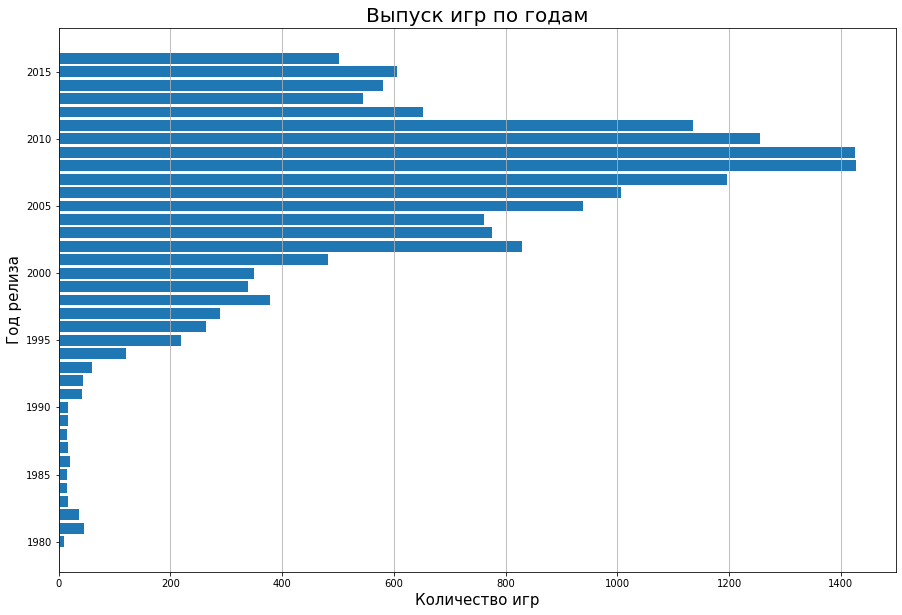

In [35]:
# Отсортирую значения по годам
games_per_year = games_per_year.sort_index()

plt.figure(figsize=(15, 10))
plt.barh(games_per_year.index, games_per_year.values)

plt.title('Выпуск игр по годам', fontsize=20)
plt.xlabel('Количество игр', fontsize=15)
plt.ylabel('Год релиза', fontsize=15)
plt.grid(axis='x')
plt.show()

Видно, что большинство игр приходится от 1995 года. Пик приходится на 2008-2009 года, после чего количество игр начало падать.

Посмотрим какой процент игр был продан до 1995 года.

In [36]:
proportion = games_per_year.loc[games_per_year.index < 1995].sum() / games_per_year.sum()
print(f'Процент игр, которые были выпущены до 1995 года: {proportion:.2%}')

Процент игр, которые были выпущены до 1995 года: 2.96%


Данные до 1995 года не так важны, так как их доля составляет всего 2.96%.

#### Как менялись продажи по платформам

Построю график, чтобы посмотреть как менялись продажи по платформам, начиная с 1995 года.

Все платформы сгруппирую по годам и посчитаю суммарные продажи по каждой платформе.
Для упрощения анализа возьму только топ-10 платформ, иначе график будет слишком загружен и на нём будет сложно что-то разглядеть.

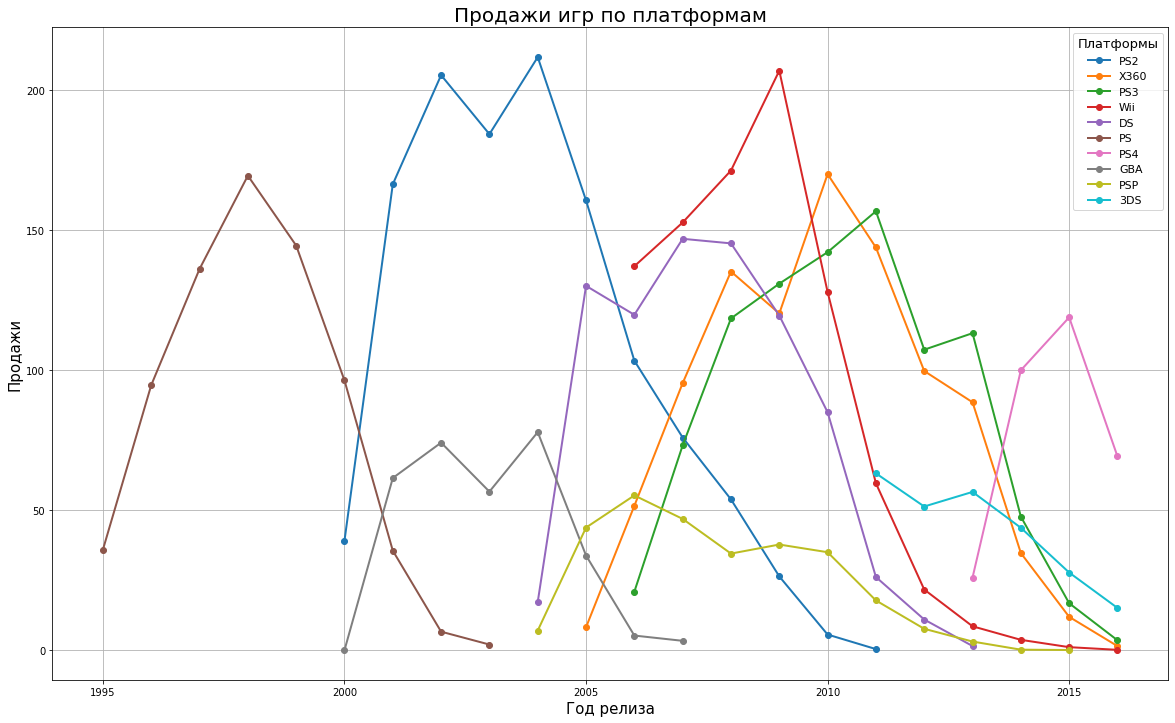

In [37]:
data_after_1995 = data.query('year_of_release >= 1995', engine='python')
top_platforms = data_after_1995.groupby('platform')['total_sales'].sum().nlargest(10).index
platforms_sales = data_after_1995.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

filtered_sales = platforms_sales[top_platforms]

plt.figure(figsize=(20, 12))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_platforms)))
for platform, color in zip(top_platforms, colors):
    plt.plot(filtered_sales.index, filtered_sales[platform], label=platform, color=color, linewidth=2, marker='o')

plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Год релиза', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.grid(True)
plt.legend(title='Платформы', title_fontsize='13', fontsize='11')
plt.show()

Из графика видно, что среднее время жизни платформы примерно 7-10 лет. Пик продаж приходится на 3-4 года после релиза платформы, после чего продажи начинают падать.
Проверим среднее время жизни платформы расчётом, чтобы сказать цифру поточнее.

Посчитаем это следующем образом: возьмём годы первого и последнего релиза игр для каждой платформы за все годы и посчитаем разницу между ними.
Затем посчитаем среднее значение этой разницы.

In [38]:
platforms_lifespan = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platforms_lifespan['lifespan'] = platforms_lifespan['max'] - platforms_lifespan['min'] + 1
platforms_lifespan['lifespan'].median()

7.0

Среднее время жизни по всем платформам, примерно 7 лет, так что мои предположения подтвердились.

#### Вывод по определению актуального периода
<a name="determination-of-the-relevant-period"></a>

Исходя из анализа данных выпуска игр по годам и как менялись продажи по платформам, я определил актуальный период с 2013 по 2016 года включительно.

Я пришёл к такому выводу по следующим причинам:
- Примерно 97% игр выпущено после 1995 года, поэтому данные до 1995 года мы отметаем на этом этапе.
- Опираемся на то, что игровая индустрия развивается динамично и нельзя брать слишком большой период.
- Затем мы смотрим на выпуск игр под конкретные платформы, видно, что в 2013 текущие тренды начали уходить и начали выпускаться новые платформы.

Выделим актуальный период в отдельный датафрейм.

In [40]:
actual_data = data.query('2013 <= year_of_release', engine='python')

Посмотрим на первые 5 строк нового датафрейма и на общую информацию о нём.

In [41]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [42]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


### Лидеры продаж среди платформ

Посмотрим на общие продажи по платформам за актуальный период.

In [43]:
platforms_total_sales = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_total_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

Лидерами по продажам являются платформы PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii и в 10 раз меньше, чем у предыдущих позиций у PSP и DS

Построю график для наглядности.

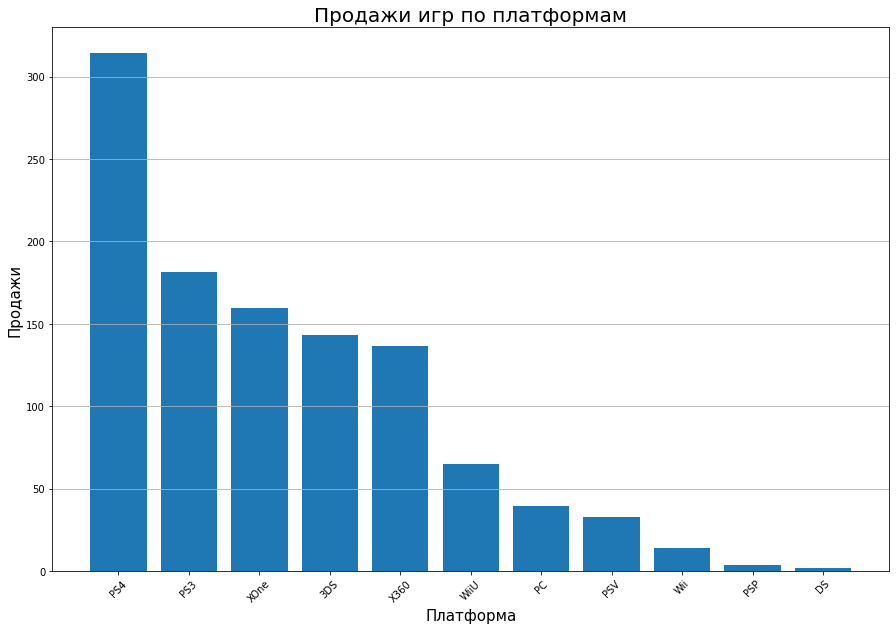

In [44]:
plt.figure(figsize=(15, 10))
plt.bar(platforms_total_sales.index, platforms_total_sales.values)

plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Посмотрим на динамику продаж по этим платформам.

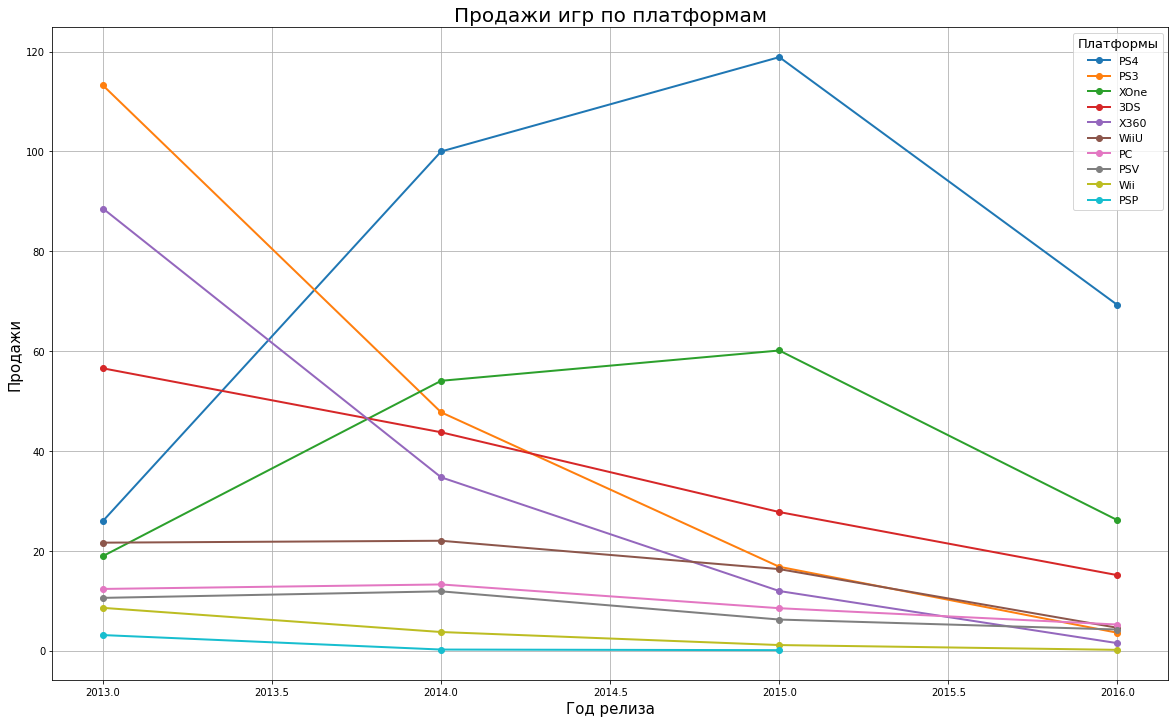

In [45]:
top_platforms = platforms_total_sales.head(10).index
platforms_sales = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

filtered_sales = platforms_sales[top_platforms]

plt.figure(figsize=(20, 12))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_platforms)))
for platform, color in zip(top_platforms, colors):
    plt.plot(filtered_sales.index, filtered_sales[platform], label=platform, color=color, linewidth=2, marker='o')

plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Год релиза', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.grid(True)
plt.legend(title='Платформы', title_fontsize='13', fontsize='11')
plt.show()

#### Вывод по лидерам продаж среди платформ
<a name="leaders-in-sales-among-platforms"></a>
Из графика видно:
- PS4 и XOne находятся на подъёме начиная с 2013 года - года их релиза.
- 2016 год ещё не закончился, данные у нас не полные, поэтому говорить о спаде продаж для них нельзя.
- Так в 2015 году продажи игр на этих платформах сильно превышают продажи на других.
- При этом продажи на PS4 значительно превышают продажи на XOne.
- Нельзя не упомянуть отдельно PC, продажи у этой платформы не сильно падают, так как они всегда были на одном уровне, но и роста тоже нет.
- Остальные платформы имеют тенденции к падению.

Потенциально прибыльными платформами являются PS4 и XOne.
При этом не стоит убирать со счетов PC, так как продажи тут всегда были на одном уровне, то есть, в целом, это довольно стабильная платформа, где можно ожидать стабильных продаж.

### Оценка выбросов по глобальным продажам в разбивке по платформам

Построю "ящик с усами" по глобальным продажам игр в разбивке в отдельности для каждой платформам.

<Figure size 1440x864 with 0 Axes>

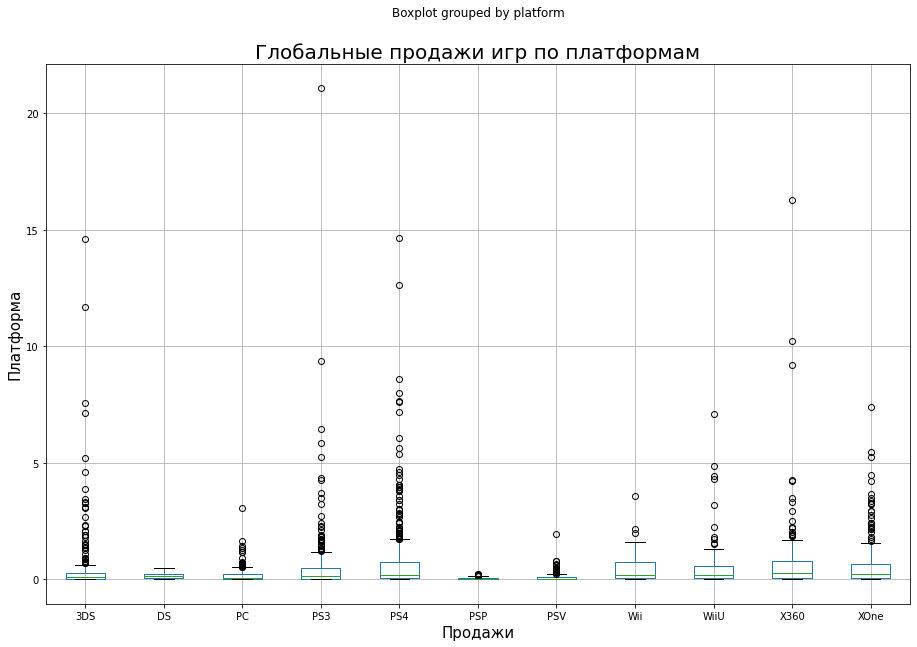

In [46]:
plt.figure(figsize=(20, 12))
actual_data.boxplot(column='total_sales', by='platform', figsize=(15, 10))

plt.title('Глобальные продажи игр по платформам', fontsize=20)
plt.xlabel('Продажи', fontsize=15)
plt.ylabel('Платформа', fontsize=15)
plt.show()

<Figure size 1440x864 with 0 Axes>

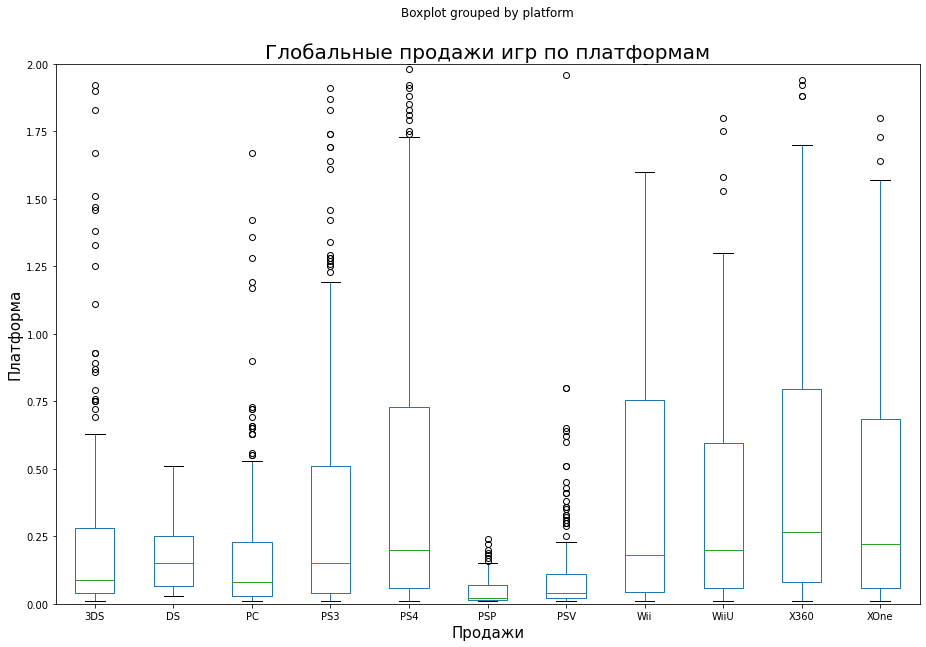

In [47]:
plt.figure(figsize=(20, 12))
actual_data.boxplot(column='total_sales', by='platform', figsize=(15, 10))

plt.title('Глобальные продажи игр по платформам', fontsize=20)
plt.xlabel('Продажи', fontsize=15)
plt.ylabel('Платформа', fontsize=15)
plt.grid()
plt.ylim(0, 2)
plt.show()

#### Вывод по оценке выбросов по глобальным продажам в разбивке по платформам
<a name="assessment-of-outliers-in-global-sales-broken-down-by-platform"></a>
Из графика видно, что у каждой платформы есть выбросы, которые сильно выходят за пределы "усов" ящика.
Скорее всего это означает, что у каждой платформы есть игры, которые продаются гораздо лучше, чем остальные.

### Влияние отзывов на продажи

Посмотрю на влияние отзывов пользователей и критиков на продажи игр на 5 самых популярных платформах

Для этого построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами.

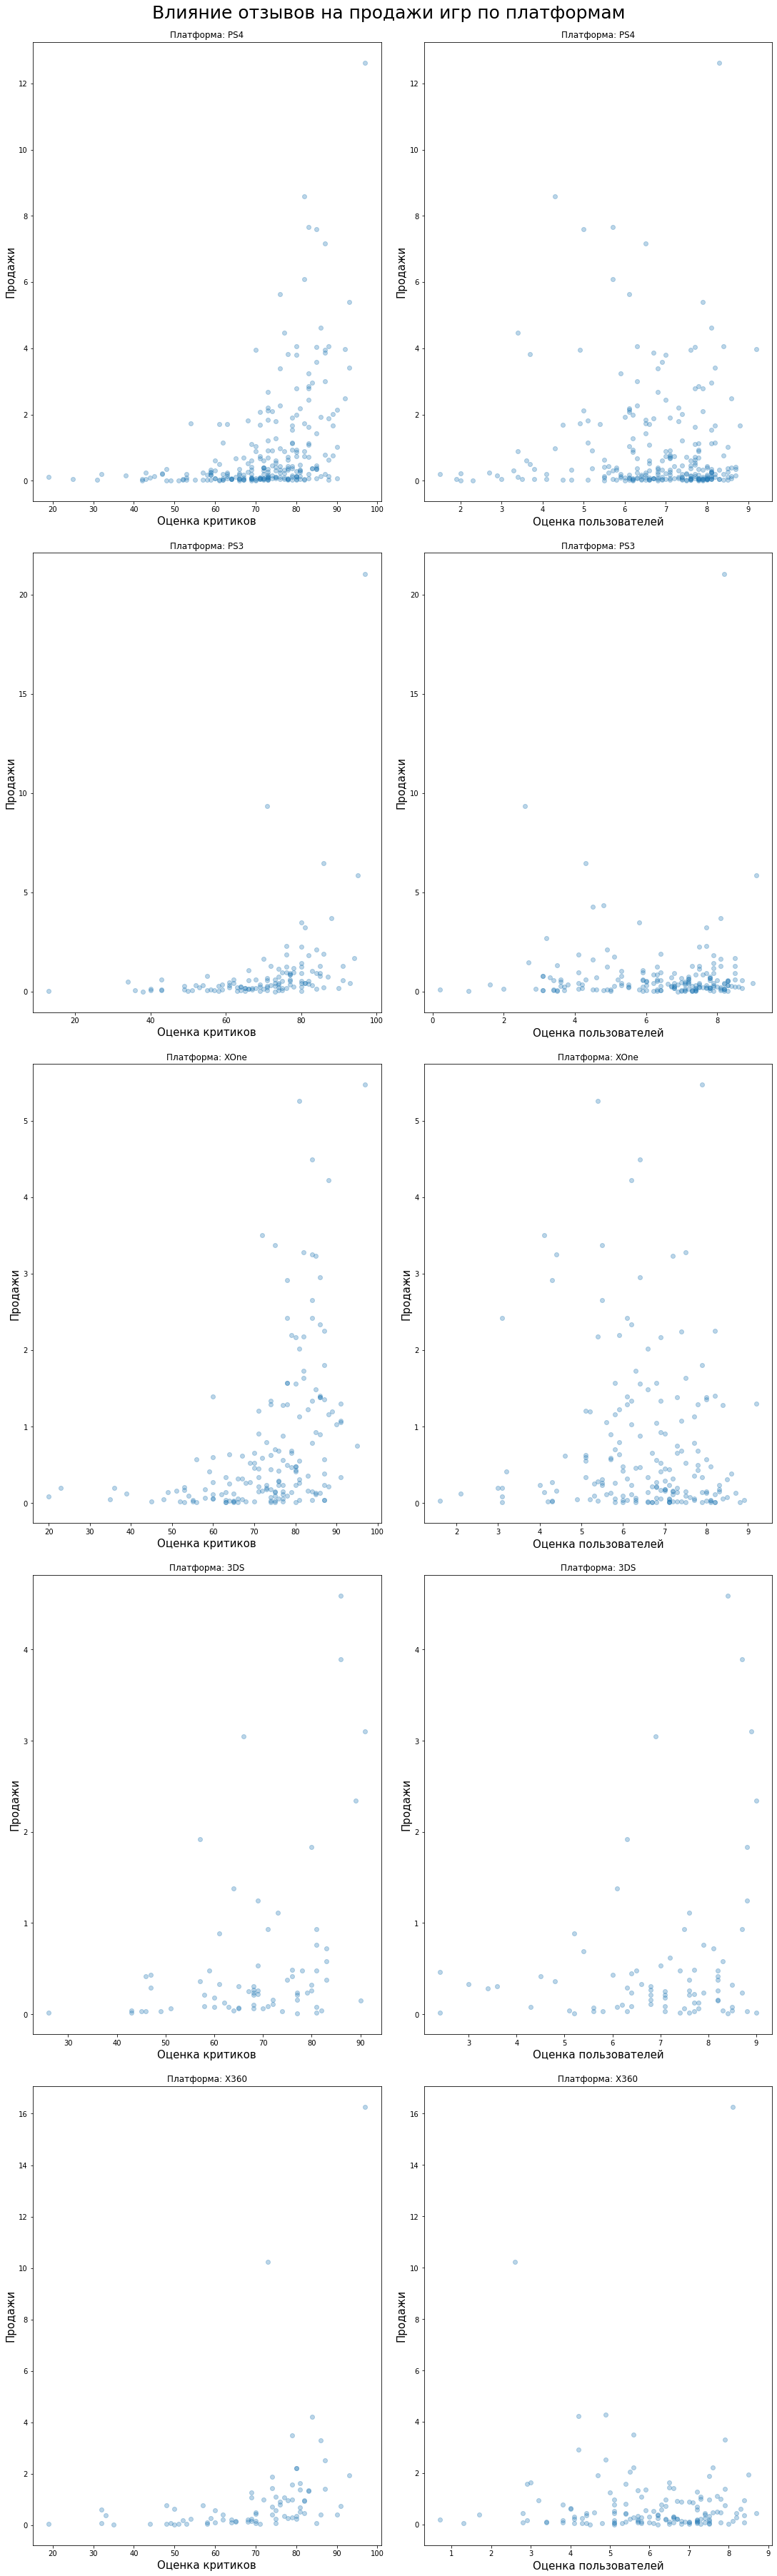

In [48]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']


fig, axs = plt.subplots(len(platforms), 2, figsize=(15, 10 * len(platforms)), constrained_layout=True)

for i, platform in enumerate(platforms):
    platform_data = actual_data.query('platform == @platform')

    axs[i, 0].scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.3)
    axs[i, 0].set_title(f'Платформа: {platform}')
    axs[i, 0].set_xlabel('Оценка критиков', fontsize=15)
    axs[i, 0].set_ylabel('Продажи', fontsize=15)

    axs[i, 1].scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.3)
    axs[i, 1].set_title(f'Платформа: {platform}')
    axs[i, 1].set_xlabel('Оценка пользователей', fontsize=15)
    axs[i, 1].set_ylabel('Продажи', fontsize=15)

fig.suptitle('Влияние отзывов на продажи игр по платформам', fontsize=25)
plt.show()

In [49]:
print('Корреляция между оценками и продажами игр на платформах:')
for platform in platforms:
    platform_data = actual_data.query('platform == @platform')
    print(f" - {platform}:")
    print(f"      Оценка критика: {platform_data['critic_score'].corr(platform_data['total_sales'])}")
    print(f"      Оценка пользователя: {platform_data['user_score'].corr(platform_data['total_sales'])}") 

Корреляция между оценками и продажами игр на платформах:
 - PS4:
      Оценка критика: 0.40656790206178095
      Оценка пользователя: -0.031957110204556376
 - PS3:
      Оценка критика: 0.3342853393371919
      Оценка пользователя: 0.0023944027357566925
 - XOne:
      Оценка критика: 0.4169983280084017
      Оценка пользователя: -0.06892505328279414
 - 3DS:
      Оценка критика: 0.3570566142288103
      Оценка пользователя: 0.24150411773563016
 - X360:
      Оценка критика: 0.3503445460228664
      Оценка пользователя: -0.011742185147181342


Из графиков и коэффициентов корреляции, что влияние отзывов не сильно велико на продажи игр.
Так, примерный средний коэффициент корреляции между оценками критиков и продажами игр \~0.35, что показывает не сильную зависимость.
В то время как зависимость между оценками пользователей и продажами ещё меньше, некоторые из них даже отрицательные.

#### Вывод по влиянию отзывов на продажи
<a name="influence-of-reviews-on-sales"></a>
Из графиков и расчётов видно:
- Что корреляция между оценкой критиков и продажами слабая, но всё же есть.
- В то время как корреляция между оценкой пользователей и продажами очень слабая.

Из этого можно сделать вывод, что оценка критиков влияет на продажи игр больше, чем оценка пользователей.
При этом стоит учитывать, что и само влияние критиков на продажи довольно слабое.

### Распределение игр по жанрам

Посмотрю на распределение игр по жанрам.

Сравню медианные значения, так как нам нужно посмотреть на стабильные жанры, не зависимые от платформы.
Может быть так, что на одном платформе жанр продаётся хорошо, а на другой нет.

In [50]:
median_genre_sales = actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
median_genre_sales

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Построю график для наглядности.

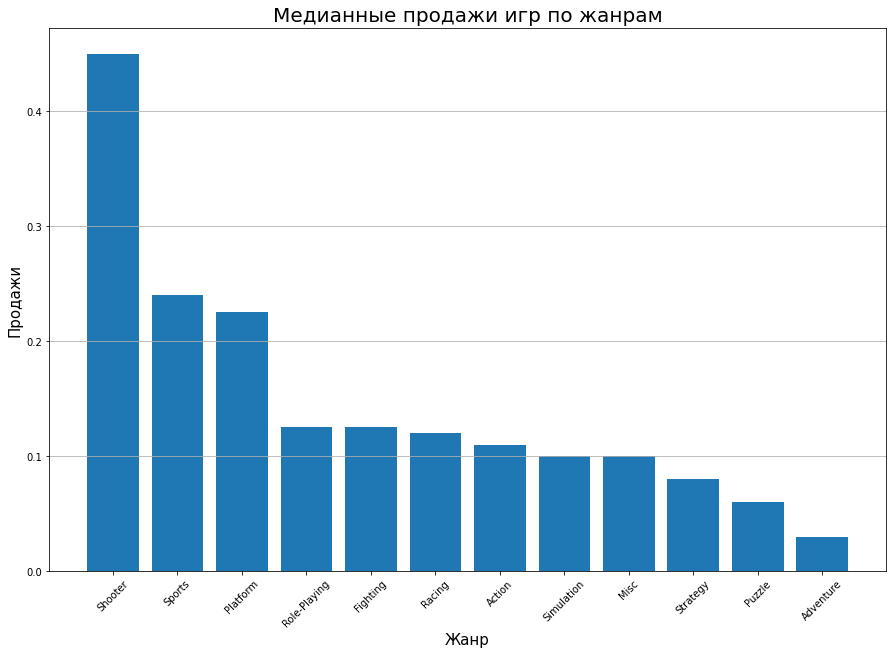

In [51]:
plt.figure(figsize=(15, 10))
plt.bar(median_genre_sales.index, median_genre_sales.values)

plt.title('Медианные продажи игр по жанрам', fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Проиллюстрирую диаграммами размаха, чтобы понять в каких жанрах есть выбросы.

<Figure size 1440x864 with 0 Axes>

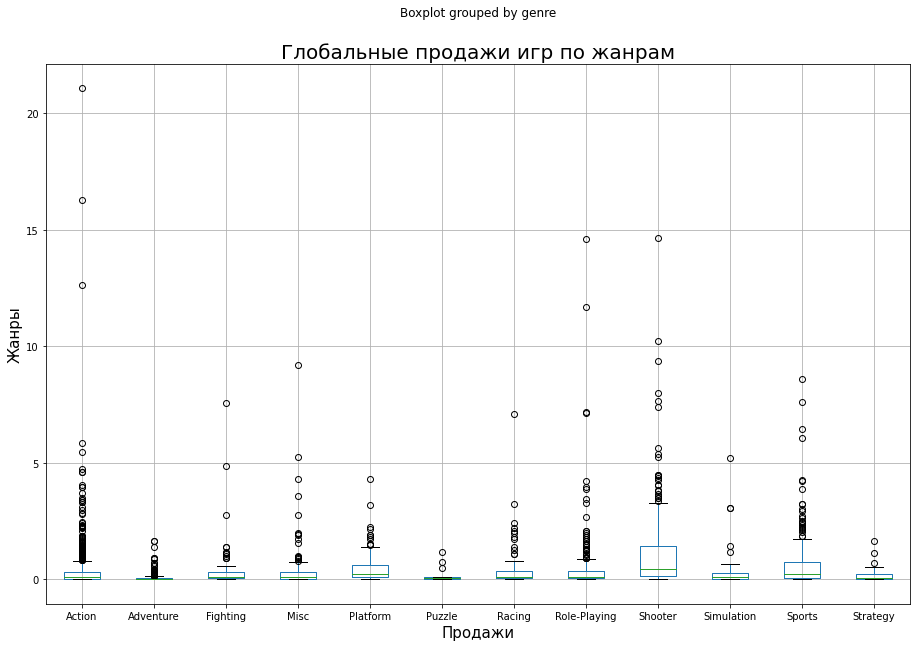

In [52]:
plt.figure(figsize=(20, 12))
actual_data.boxplot(column='total_sales', by='genre', figsize=(15, 10))

plt.title('Глобальные продажи игр по жанрам', fontsize=20)
plt.xlabel('Продажи', fontsize=15)
plt.ylabel('Жанры', fontsize=15)
plt.show()

<Figure size 1440x864 with 0 Axes>

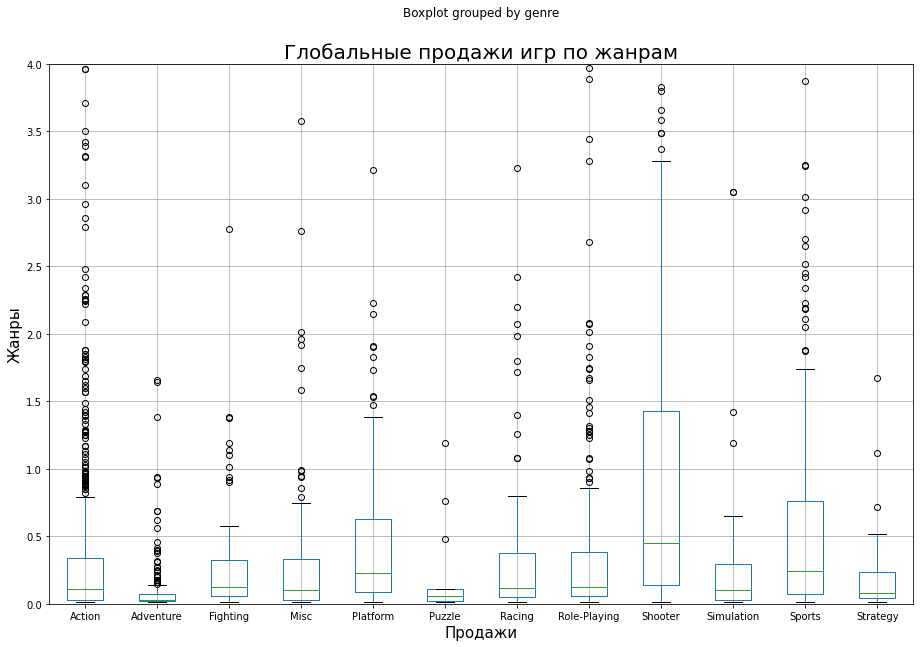

In [53]:
plt.figure(figsize=(20, 12))
actual_data.boxplot(column='total_sales', by='genre', figsize=(15, 10))

plt.title('Глобальные продажи игр по жанрам', fontsize=20)
plt.xlabel('Продажи', fontsize=15)
plt.ylabel('Жанры', fontsize=15)
plt.ylim(0, 4)
plt.show()

#### Вывод по распределению игр по жанрам
<a name="distribution-of-games-by-genre"></a>
Из графика по медианным продажам видно, что больше всего продаж приходится на жанры Shooter, Sports и Platform.
Самые низкие продажи у жанров Strategy, Puzzle и Adventure.

Также если посмотреть на диаграммы размаха, то видно, что почти у всех жанров довольно много выбросов, только у Strategy, Puzzle и Simulation их мало. В целом, хорошей стабильностью выделяются жанры Shooter, Sports и Platform. Так что график медианных продаж довольно показательный, но это и не удивительно, так как медиана довольно устойчива к выбросам.

Отдельно выделяется жанр Shooter, так как продажи у него в \~2 раза больше, чем у второго по продажам жанра - Sports.
Самые низкие продажи у жанра Adventure, у него продажи в \~2 раза меньше, чем у предпоследнего жанра - Puzzle.

Конечно не стоит забывать, что обычно у игр несколько жанров и они могут быть разными и не всегда понятно какой жанр основной.
Поэтому это распределение не совсем корректно, но всё равно даёт представление о том, какие жанры продаются лучше, а какие хуже.

Из этого, можно сделать вывод, что нужно ориентироваться на жанры Shooter, Sports и Platform, так как они приносят больше всего денег.

### Вывод по исследовательскому анализу данных
<a name="research-conclusion"></a>
В ходе исследовательского анализа данных было выявлено:
- Больше всего игр выпускалось в 2008-2009 годах, после чего количество игр начало падать.
- Среднее время жизни платформы примерно 7 лет.
- Пик продаж приходится на 3-4 года после релиза платформы.
- Актуальный период для анализа данных - с 2013 по 2016 года включительно.
- Потенциально прибыльными платформами являются PS4 и XOne.
- Оценка критиков влияет на продажи игр больше, чем оценка пользователей. При этом само влияние критиков на продажи довольно слабое.
- Нужно ориентироваться на жанры Shooter, Sports и Platform, так как это стабильно популярные жанры, которые хорошо продаются.
- У каждой платформы есть игры, которые продаются гораздо лучше, чем остальные.

На основе этого анализа можно сделать вывод, что для планирования рекламных кампаний на 2017 год стоит ориентироваться на игры для платформ PS4 и XOne, жанры Shooter, Sports и Platform, неплохо будет ориентироваться на высокие оценки критиков, но последнее - не решающий фактор.

Подробнее про каждый пункт можно прочитать в соответствующем выводе:
- [Определение актуального периода](#determination-of-the-relevant-period)
- [Лидеры продаж среди платформ](#leaders-in-sales-among-platforms)
- [Оценка выбросов по глобальным продажам в разбивке по платформам](#assessment-of-outliers-in-global-sales-broken-down-by-platform)
- [Влияние отзывов на продажи](#influence-of-reviews-on-sales)
- [Распределение игр по жанрам](#distribution-of-games-by-genre)

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

Посмотрю на самые популярные платформы в каждом регионе.

Для этого построю графики.

In [54]:
actual_data_by_platform = actual_data.groupby('platform')

na_platforms = actual_data_by_platform['na_sales'].sum().nlargest(5)
eu_platforms = actual_data_by_platform['eu_sales'].sum().nlargest(5)
jp_platforms = actual_data_by_platform['jp_sales'].sum().nlargest(5)
other_platforms = actual_data_by_platform['other_sales'].sum().nlargest(5)

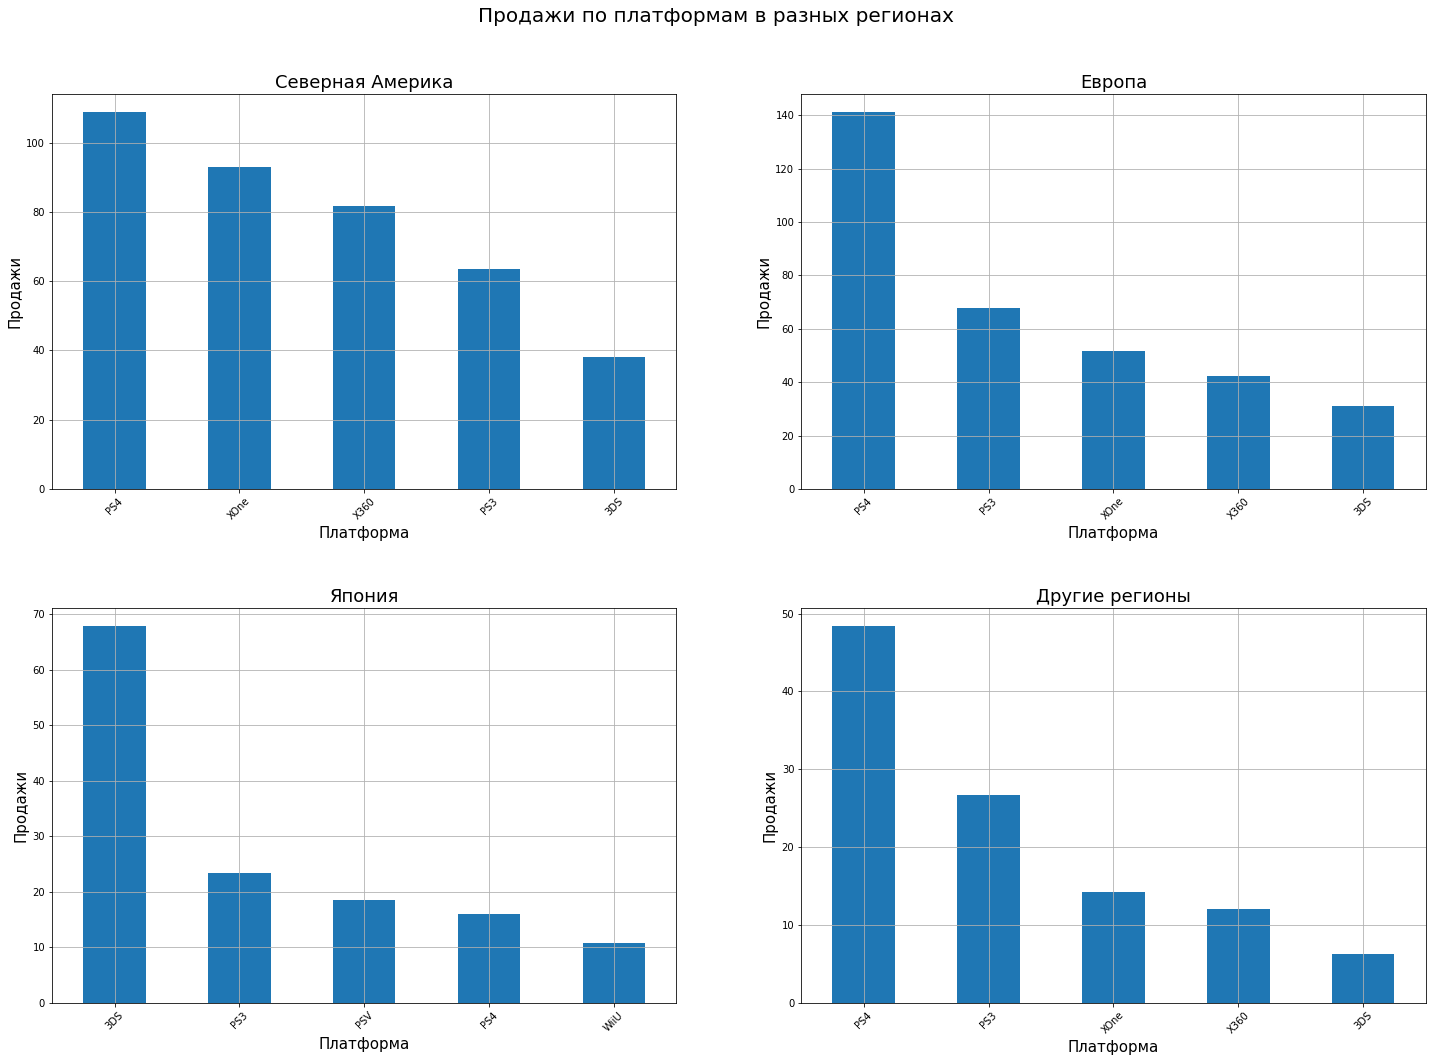

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Продажи по платформам в разных регионах', fontsize=20)

na_platforms.plot(kind='bar', ax=axes[0, 0], title='Северная Америка', rot=45, grid=True)
eu_platforms.plot(kind='bar', ax=axes[0, 1], title='Европа', rot=45, grid=True)
jp_platforms.plot(kind='bar', ax=axes[1, 0], title='Япония', rot=45, grid=True)
other_platforms.plot(kind='bar', ax=axes[1, 1], title='Другие регионы', rot=45, grid=True)

for ax in axes.flat:
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Продажи')
    ax.title.set_size(18)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)
plt.show()

Посмотрю на доли продаж

In [56]:
def shares_by_platform(region, title):
    print(f'Доли продаж по платформам в регионе {title}')

    platform_region_sales = actual_data_by_platform[region].sum()
    region_sales = actual_data[region].sum()

    return (pd.DataFrame((platform_region_sales / region_sales) * 100)
     .sort_values(by=region, ascending=False)
     .style.format("{:.2f}%")
     .background_gradient('coolwarm')
    )

In [57]:
shares_by_platform(region='na_sales', title='Северная Америка')

Доли продаж по платформам в регионе Северная Америка


,na_sales
platform,
PS4,24.84%
XOne,21.27%
X360,18.66%
PS3,14.51%
3DS,8.73%
WiiU,6.67%
PC,2.54%
Wii,1.50%
PSV,1.15%


In [58]:
shares_by_platform(region='eu_sales', title='Европа')

Доли продаж по платформам в регионе Европа


,eu_sales
platform,
PS4,35.97%
PS3,17.29%
XOne,13.15%
X360,10.84%
3DS,7.89%
PC,6.47%
WiiU,5.06%
PSV,1.56%
Wii,1.51%


In [59]:
shares_by_platform(region='jp_sales', title='Япония')

Доли продаж по платформам в регионе Япония


,jp_sales
platform,
3DS,48.17%
PS3,16.59%
PSV,13.21%
PS4,11.34%
WiiU,7.73%
PSP,2.34%
X360,0.36%
XOne,0.24%
Wii,0.04%


In [60]:
shares_by_platform(region='other_sales', title='Другие')

Доли продаж по платформам в регионе Другие


,other_sales
platform,
PS4,40.30%
PS3,22.31%
XOne,11.89%
X360,10.09%
3DS,5.23%
WiiU,3.91%
PSV,2.72%
PC,2.47%
Wii,0.93%


#### Вывод по самым популярным платформам
<a name="the-most-popular-platforms-top-5"></a>
Из графиков и таблицей долей виден топ 5 по платформам для каждого региона:
- Северная Америка: PS4 (\~25%), XOne(\~21%), X360 (\~19%), PS3 (\~15%) и 3DS (\~9%)
- Европа: PS4 (\~36%), PS3 (\~17%), XOne(\~13%), X360 (\~11%) и 3DS (\~8%)
- Япония: 3DS (\~48%), PS3 (\~17%), PSV (\~13%), PS4 (\~11%) и WiiU (\~8%)
- Другие Регионы: PS4 (\~40%), PS3 (\~22%), XOne(\~12%), X360 (\~10%) и 3DS (\~5%)

Из этого можно сделать вывод, что в каждом регионе есть свои особенности, но везде в топ входят PS3 и PS4.
Если смотреть в рамках мира, то сделать ставку на новую PS4 и старичка PS3 - это хорошая идея.
Последняя популярна во всех регионах и игры в следующем году на неё также будут хорошо продаваться в перспективе, а PS4 уже набрала обороты и игры на неё хорошо продаются.

При этом если смотреть только на Японию, то стоит обратить внимание на 3DS, так как она на голову опережает остальные.
Также во всём мире, кроме Японии, очень хорошо продаются игры на XOne и X360.

### Самые популярные жанры (топ-5)

Посмотрю на самые популярные жанры в каждом регионе.

Для этого построю графики.

In [62]:
actual_data_by_genre = actual_data.groupby('genre')

na_genres = actual_data_by_genre['na_sales'].sum().nlargest(5)
eu_genres = actual_data_by_genre['eu_sales'].sum().nlargest(5)
jp_genres = actual_data_by_genre['jp_sales'].sum().nlargest(5)
other_genres = actual_data_by_genre['other_sales'].sum().nlargest(5)

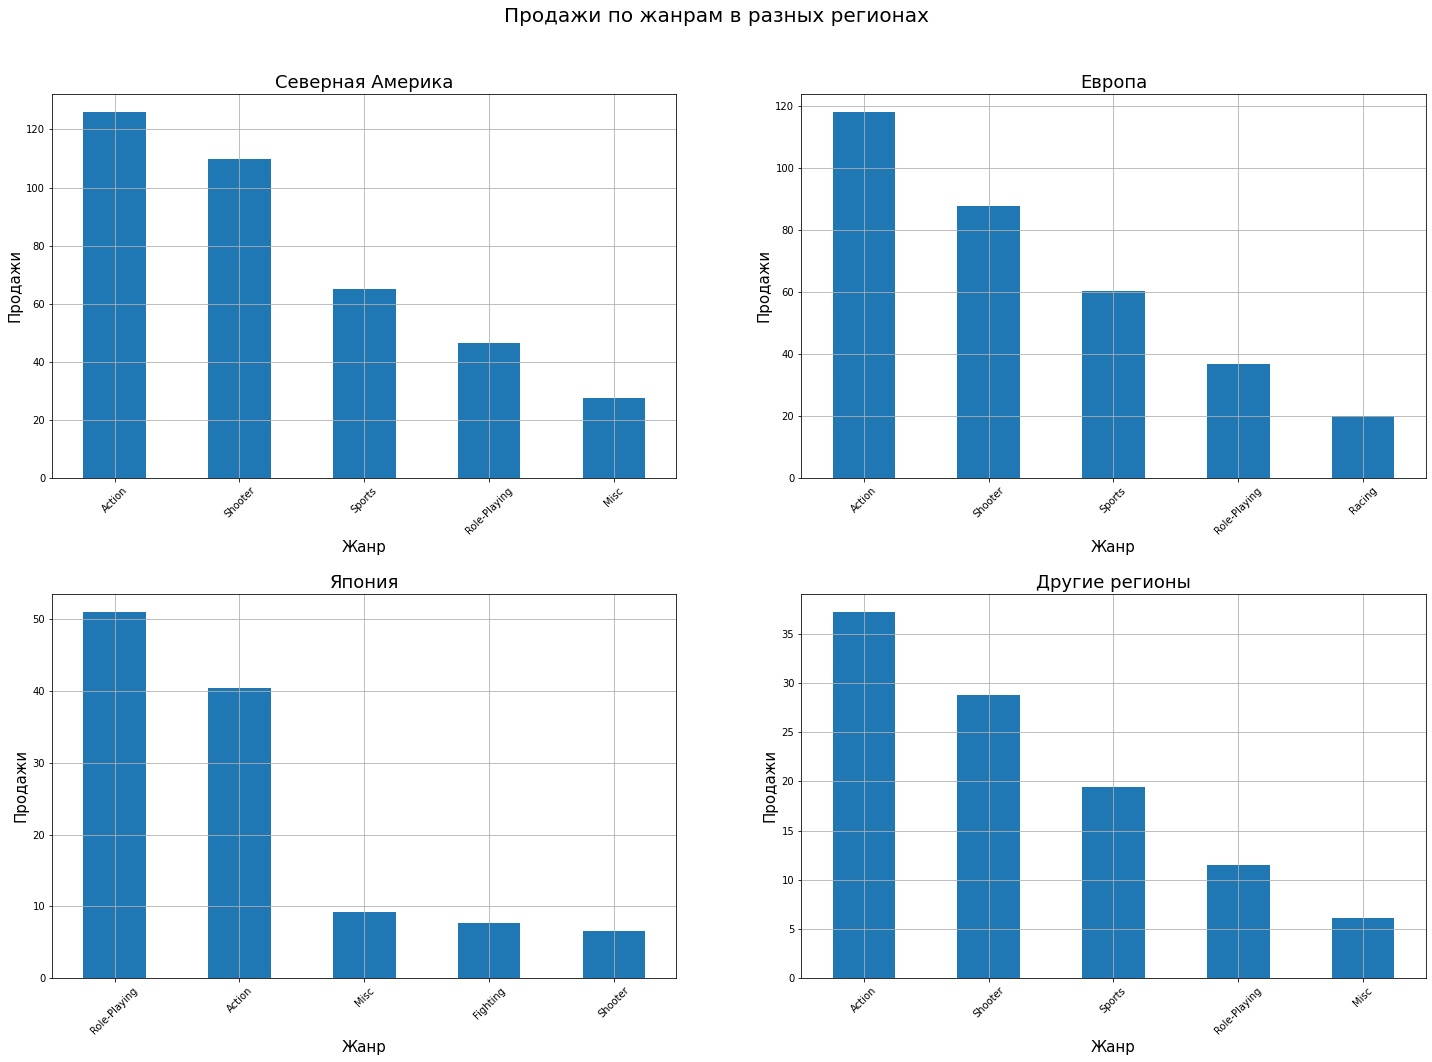

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Продажи по жанрам в разных регионах', fontsize=20)

na_genres.plot(kind='bar', ax=axes[0, 0], title='Северная Америка', rot=45, grid=True)
eu_genres.plot(kind='bar', ax=axes[0, 1], title='Европа', rot=45, grid=True)
jp_genres.plot(kind='bar', ax=axes[1, 0], title='Япония', rot=45, grid=True)
other_genres.plot(kind='bar', ax=axes[1, 1], title='Другие регионы', rot=45, grid=True)

for ax in axes.flat:
    ax.set_xlabel('Жанр')
    ax.set_ylabel('Продажи')
    ax.title.set_size(18)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)
plt.show()

Построим круговые диаграммы, чтобы посмотреть доли продаж по жанрам.

In [64]:
def shares_by_genre(region, title):
    print(f'Доли продаж по жанрам в регионе {title}')

    genre_region_sales = actual_data_by_genre[region].sum()
    region_sales = actual_data[region].sum()

    return (pd.DataFrame((genre_region_sales / region_sales) * 100)
     .sort_values(by=region, ascending=False)
     .style.format("{:.2f}%")
     .background_gradient('coolwarm')
    )

In [65]:
shares_by_genre(region='na_sales', title='Северная Америка')

Доли продаж по жанрам в регионе Северная Америка


,na_sales
genre,
Action,28.80%
Shooter,25.07%
Sports,14.91%
Role-Playing,10.60%
Misc,6.28%
Platform,4.14%
Fighting,3.55%
Racing,2.96%
Adventure,1.63%


In [66]:
shares_by_genre(region='eu_sales', title='Европа')

Доли продаж по жанрам в регионе Европа


,eu_sales
genre,
Action,30.12%
Shooter,22.40%
Sports,15.43%
Role-Playing,9.43%
Racing,5.15%
Misc,5.11%
Platform,3.97%
Simulation,2.78%
Fighting,2.18%


In [67]:
shares_by_genre(region='jp_sales', title='Япония')

Доли продаж по жанрам в регионе Япония


,jp_sales
genre,
Role-Playing,36.26%
Action,28.76%
Misc,6.54%
Fighting,5.43%
Shooter,4.70%
Adventure,4.13%
Sports,3.84%
Platform,3.40%
Simulation,3.21%


In [68]:
shares_by_genre(region='other_sales', title='Другие')

Доли продаж по жанрам в регионе Другие


,other_sales
genre,
Action,31.01%
Shooter,23.98%
Sports,16.21%
Role-Playing,9.57%
Misc,5.08%
Racing,3.70%
Platform,3.43%
Fighting,2.97%
Adventure,2.03%


Выведем самые популярные общие жанры для всех регионов.

#### Вывод по самым популярным жанрам
<a name="the-most-popular-genres-top-5"></a>
Из графиков и таблицей долей виден топ 5 по жанрам для каждого региона:
- Северная Америка: Actions (\~29%), Shooter (\~25%), Sports (\~15%), Role-Playing (\~11%) и Misc (\~6%)
- Европа: Actions (\~30%), Shooter (\~22%), Sports (\~16%), Role-Playing (\~10%) и Racing (\~5%)
- Япония: Role-Playing (\~36%), Actions (\~29%), Misc (\~7%), Fighting (\~6%) и Shooter (\~5%)
- Другие Регионы: Actions (\~31%), Shooter (\~24%), Sports (\~16%), Role-Playing (\~10%) и Misc (\~5%)

Из этого можно сделать вывод, что если мы хотим ориентироваться на весь мир, то стоит делать ставку на жанры Action, Role-Playing, Sports и Misc.
И если не включать Японию, то обязательно нужно ставить на Shooter, так как он входит в топ-2 во всех регионах, кроме Японии.

Япония конечно стоит особняком, тут нужно делать отдельную ставку на Role-Playing, но не забывать, что это именно JRPG, а не обычные RPG.
В этом жанре есть своя специфика, обычно данные игры делают сами японцы, что может говорить, в том числе о поддержке отечественного производителя.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Посмотрю на влияние рейтинга ESRB на продажи игр в каждом регионе.

In [69]:
na_rating = actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating = actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating = actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
other_rating = actual_data.groupby('rating')['other_sales'].sum().sort_values(ascending=False)

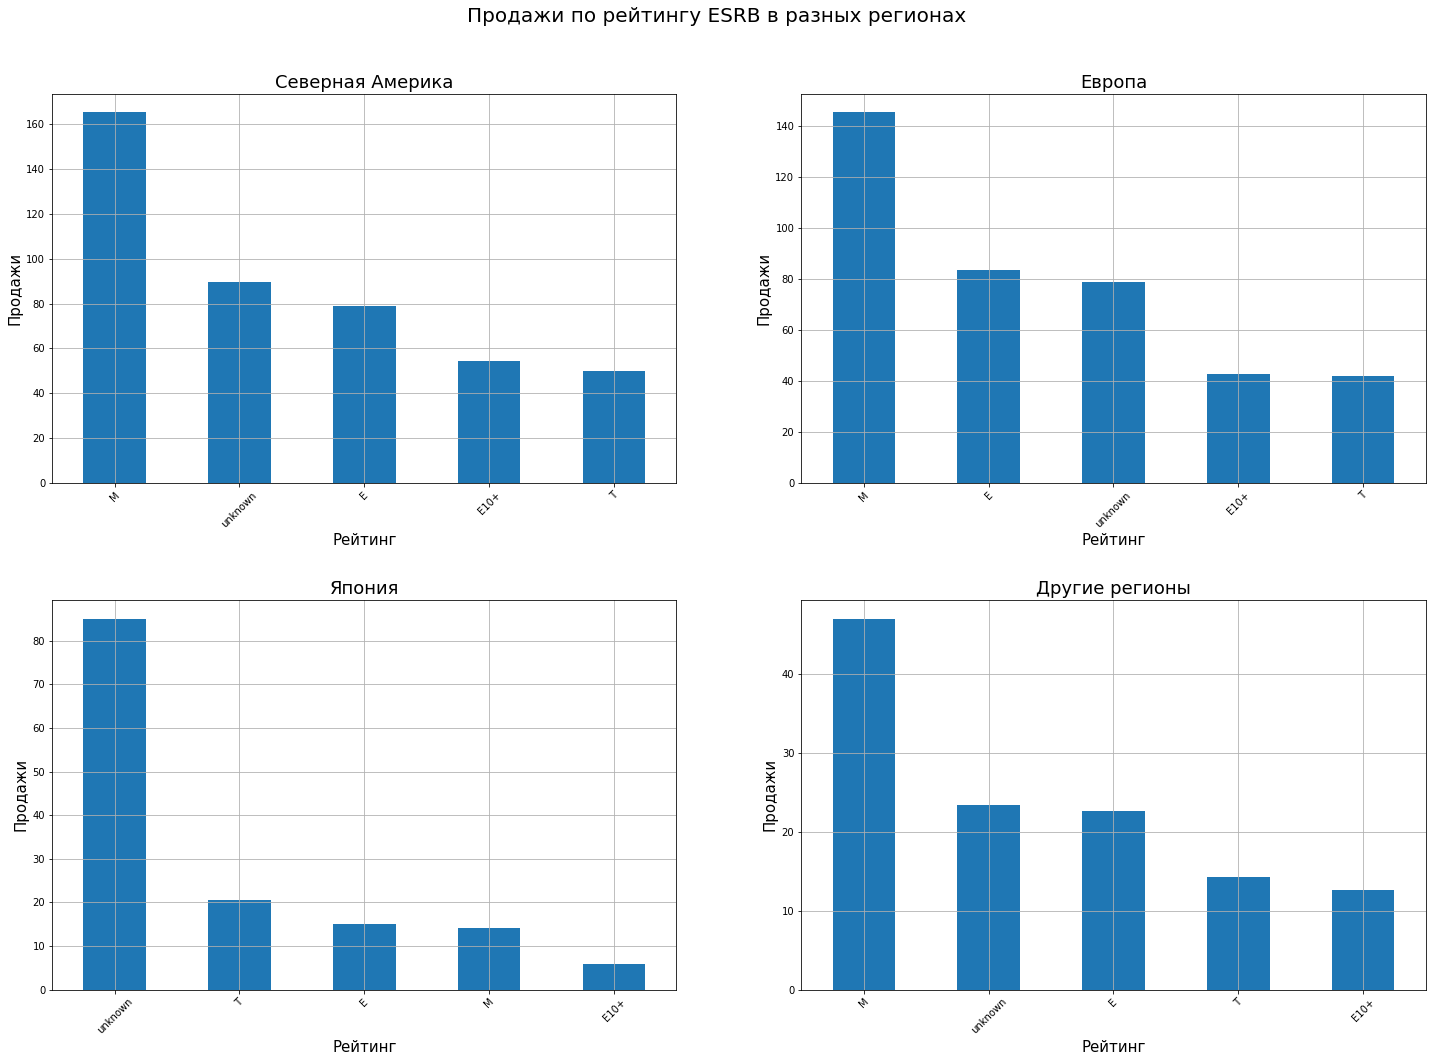

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Продажи по рейтингу ESRB в разных регионах', fontsize=20)

na_rating.plot(kind='bar', ax=axes[0, 0], title='Северная Америка', rot=45, grid=True)
eu_rating.plot(kind='bar', ax=axes[0, 1], title='Европа', rot=45, grid=True)
jp_rating.plot(kind='bar', ax=axes[1, 0], title='Япония', rot=45, grid=True)
other_rating.plot(kind='bar', ax=axes[1, 1], title='Другие регионы', rot=45, grid=True)

for ax in axes.flat:
    ax.set_xlabel('Рейтинг')
    ax.set_ylabel('Продажи')
    ax.title.set_size(18)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)

plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.2, hspace=0.3)
plt.show()

#### Вывод по влиянию рейтинга ESRB на продажи в отдельном регионе
<a name="the-influence-of-the-esrb-rating-on-sales"></a>
Из графиков видно, что:
- В каждом регионе сильно лидирует рейтинг M - для лиц старше 17 лет, за исключением Японии, там он на четвёртом месте.
- На втором месте во всех регионах, кроме опять же Японии, находится рейтинг E - для всех. В Японии E - на третьем месте.
- На последнем или предпоследних местах во всех регионах, находится рейтинг T - для подростков, кроме Японии там он на втором.
- Отдельно для Японии выделяется неизвестный для нас рейтинг, который мы на предобработке заменили на 'unknown' - он занимает первое место. Это скорее всего из-за того, что, как я и писал ранее, в Японии есть своя система оценки игр - CERO. К сожалению, видимо, она не учитывалась в этом датасете.
- В Северной Америке и Европе тоже есть 'unknown'. для Европы это скорее всего из-за того, что там есть своя система оценки игр - PEGI, которая опять же не учитывалась.

Из этого можно сделать вывод:
- Во всех регионах лучше всего делать ставку на игры с рейтингом M и E, так как они продаются лучше всего, кроме Японии, там лидирует T.
- Затем уже стоит обращать внимание на рейтинг T и E10+.

### Вывод по портрету пользователя каждого региона
<a name="the-user-portrait-of-each-region"></a>
Из анализа данных по портрету пользователя каждого региона можно сделать вывод, что:
- Если ориентировать на мир, то лучше всего сделать ставку на PS3 и её наследницу PS4.
- Также стоит обратить внимание на XOne и X360, если ориентироваться на все регионы, кроме Японии.
- Если ориентироваться только на Японию, то стоит обратить внимание на 3DS.
- Самые популярные жанры во всех регионах - Action, Role-Playing, Sports и Misc.
- Если не учитывать Японию, то стоит обратить внимание на Shooter.
- В Японии же стоит делать ставку на Role-Playing, но не забывать, что это именно JRPG, а не обычные RPG.
- Во всех регионах лучше всего делать ставку на игры с рейтингом M, так как они продаются лучше всего. Затем уже стоит обращать внимание на рейтинг E и T. Для Японии, наоборот, нужно обращать внимание на рейтинг T и E, а также на их собственную систему оценки.

Подробнее про каждый пункт можно прочитать в соответствующем выводе:
- [Самые популярные платформы](#the-most-popular-platforms-top-5)
- [Самые популярные жанры](#the-most-popular-genres-top-5)
- [Влияние рейтинга ESRB на продажи в отдельном регионе](#the-influence-of-the-esrb-rating-on-sales)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулирую нулевую и альтернативную гипотезы:
- H₀ (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H₁ (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC различаются.

Уровень значимости возьму 0.05. Проверю гипотезу с помощью t-теста для независимых выборок.

In [71]:
xone_user_score = actual_data.query('platform == "XOne" and user_score.notna()')['user_score']
pc_user_score = actual_data.query('platform == "PC" and user_score.notna()')['user_score']

results = st.ttest_ind(xone_user_score, pc_user_score)
alpha = 0.05

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print(f'Средние пользовательские рейтинги платформы XOne: {xone_user_score.mean()}')
print(f'Средние пользовательские рейтинги платформы PC: {pc_user_score.mean()}')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
Средние пользовательские рейтинги платформы XOne: 6.521428571428572
Средние пользовательские рейтинги платформы PC: 6.2696774193548395


#### Вывод по гипотезе "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Полученное p-значение говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.
Даже если уровень значимости взять 0.01, то ничего не изменится, p-значение всё равно будет меньше уровня значимости.

Соответственно нельзя ориентироваться на то, что средние пользовательские рейтинги для Xbox One будут такими же, как и для PC.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулирую нулевую и альтернативную гипотезы:
- H₀ (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H₁ (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports различаются.

Уровень значимости возьму 0.05. Проверю гипотезу с помощью t-теста для независимых выборок.

In [72]:
action_user_score = actual_data.query('genre == "Action" and user_score.notna()')['user_score']
sports_user_score = actual_data.query('genre == "Sports" and user_score.notna()')['user_score']

results = st.ttest_ind(action_user_score, sports_user_score)
alpha = 0.05

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print(f'Средние пользовательские рейтинги жанра Action: {action_user_score.mean()}')
print(f'Средние пользовательские рейтинги жанра Sports: {sports_user_score.mean()}')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средние пользовательские рейтинги жанра Action: 6.837532133676092
Средние пользовательские рейтинги жанра Sports: 5.238124999999999


#### Вывод по гипотезе "Средние пользовательские рейтинги жанров Action и Sports разные"

Полученное p-значение говорит о том, что средние пользовательские рейтинги жанров Action и Sports различаются.
Даже если уровень значимости взять 0.01, то ничего не изменится, p-значение всё равно будет меньше уровня значимости.

Соответственно мы подтвердили, что средние пользовательские рейтинги жанров Action и Sports разные.
Это опять же нам даёт понимание, что нельзя ориентироваться на то, что средние пользовательские рейтинги для Action будут такими же, как и для Sports.

### Вывод по проверке гипотез
<a name="the-conclusion-of-the-hypotheses"></a>
По результатам проверки гипотез можно сделать вывод, что:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются.
- Средние пользовательские рейтинги жанров Action и Sports различаются.

*Как я сформулировал нулевую и альтернативную гипотезы:*
Я сформулировал нулевую и альтернативную гипотезы на основании того, что средние значения для двух выборок равны или же не равны.
Это делается для того, чтобы проверить, есть ли статистически значимые различия между средними значениями двух выборок.

*Какой критерий применял для проверки гипотез и почему:*
Для проверки гипотез я использовал t-тест Стьюдента для независимых выборок.
Этот критерий я выбрал, потому что он позволяет проверить гипотезу о равенстве средних значений двух независимых выборок.

## Общий вывод

В ходе выполнения проекта изначально были предобработаны данные:
- Заменены названия столбцов (приведены к нижнему регистру).
- Преобразованы данные в нужные типы.
- Обработаны пропуски.
- Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

Отмечу, что очень много пропусков в столбцах с оценками пользователей и критиков, а также в рейтинге ESRB. Скорее всего это связано с тем, что данные выгружались из источников из Северной Америки, об этом можно судить из-за рейтинга ESRB, в других регионах используют другие системы оценки игр. Скорее всего это повлияло и на пропуски в оценках пользователей и критиков, так как в других регионах могут использовать другие ресурсы для оценки игр.
В будущем такие вещи нужно учитывать, если мы хотим обрабатывать данные для всего мира, а не только для Северной Америки.
[Подробнее в выводе по предобработке данных](#data-preprocessing-conclusion).

Далее был проведён исследовательский анализ данных:
- Я определил актуальный период для анализа с 2013 по 2016 года включительно. Я выбрал этот период на основании того сколько игр выпускалось в разные годы и как менялись продажи по платформам.
- Лидерами по продажам среди платформ за актуальный период оказались PS4 и XOne.
- Потенциально прибыльными платформами остаются PS4 и XOne, так как они активно развиваются.
- Оценка критиков влияет на продажи игр больше, чем оценка пользователей. При этом само влияние критиков на продажи довольно слабое.
- Нужно ориентироваться на жанры Shooter, Sports и Platform, так как это стабильно популярные жанры, которые хорошо продаются.
- У каждой платформы есть игры, которые продаются гораздо лучше, чем остальные.

[Подробнее в выводе по исследовательскому анализу данных](#research-conclusion).

Затем я составил портрет пользователя каждого региона:
- Если ориентировать на мир, то лучше всего сделать ставку на PS3 и её наследницу PS4.
- Также стоит обратить внимание на XOne и X360, если ориентироваться на все регионы, кроме Японии.
- Если ориентироваться только на Японию, то стоит обратить внимание на 3DS.
- Самые популярные жанры во всех регионах - Action, Role-Playing, Sports и Misc. Если не учитывать Японию, то стоит обратить внимание на Shooter. В Японии же стоит делать ставку на Role-Playing, но не забывать, что это именно JRPG, а не обычные RPG.
- Во всех регионах лучше всего делать ставку на игры с рейтингом M, так как они продаются лучше всего. Для Японии, наоборот, нужно обращать внимание на рейтинг T.

[Подробнее в выводе по портрету пользователя каждого региона](#the-user-portrait-of-each-region).

И в заключении я проверил две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются.
- Средние пользовательские рейтинги жанров Action и Sports также различаются.

Из этого можно сделать вывод, что нельзя ориентироваться на рейтинги пользователей для одной платформы, если хочешь понять какие они будут для другой.
Опять же это скорее всего связано с тем, что игры для разных платформ могут выходить в разном техническом состоянии.
Также нельзя ориентироваться на рейтинги пользователей для одного жанра, если хочешь понять какие они будут для другого.
[Подробнее в выводе по проверке гипотез](#the-conclusion-of-the-hypotheses).

Для планирования рекламных кампаний на 2017 год стоит обратить внимание на следующие платформы: PS4 и XOne
Это две платформы, которые и сейчас чувствуют себя отлично и так будет ещё несколько лет. PS4 и XOne набирают обороты. На 3DS мы ориентируемся, если хотим работать на Японию.

Успешные жанры: Action, Sports, Shooter и Role-Playing. Если первые два жанра популярны во всех регионах, то предпоследний не популярен в Японии. При этом последний наоборот сильно популярен только в Японии. При этом важно, что это именно JRPG, а не обычные RPG - существенная региональная специфика.

И делаем ставку на игры с рейтингом M, так как они продаются лучше всего. Затем уже стоит обращать внимание на рейтинг E и T. Для Японии, наоборот, сначала на T, потом на E и M.

В заключении можно сказать, что определяющие успешность игры закономерности:
- Платформа PS4.
- Жанр игры - Shooter.
- Рейтинг ESRB - M.
- Хорошие оценки критиков, хотя это сильно и не влияет на продажи.

Выгоднее всего рекламировать игры в регионах Северная Америка и Европа, на платформы PS4 и XOne, с рейтингом M и хорошими оценками критиков.